In [1]:
%matplotlib inline

In [2]:
#############################################
# to find "invlib" in the main folder
import sys, os
sys.path.insert(0, os.path.abspath("../.."))
#############################################

# Plot settings

In [3]:
from invlib import set_style
set_style()
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, NullFormatter, FixedLocator
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

# Dummy data

In [4]:
MCM = np.abs(np.load("./MCMs.npz"))
R = MCM
n = 5

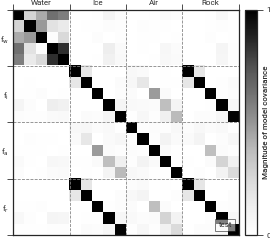

In [80]:
# Plot

fig, ax = plt.subplots(figsize=(4,4))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="3%")

lower_limit = 0
im = ax.imshow(R, cmap="Greys", vmin=lower_limit, vmax=1)
cbar = fig.colorbar(im, orientation="vertical", cax=cax, pad=0)
cbar.set_label(label="Magnitude of model covariance", labelpad=-8)
cbar.set_ticks([lower_limit, 1])
#cbar.set_ticklabels(["-1", " 1"])

ax.set_aspect("equal")
ticks = np.linspace(-0.5, 4*n -0.5, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlim(-0.5, 4*n - 0.5)
ax.set_ylim(-0.5, 4*n - 0.5)

ax.invert_yaxis()
ax.xaxis.tick_top()

minorLocator = FixedLocator(ticks[:-1] + n/2)
majorFormatter = NullFormatter()
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

labels = [r"f$_{\rm %s}$" % x for x in "wiar"]
long_labels = ["Water", "Ice", "Air","Rock"]
ax.set_xticklabels(long_labels, minor=True)
ax.set_yticklabels(labels, minor=True)

ax.tick_params(axis='x', which='minor', top=False)
ax.tick_params(axis='y', which='minor', left=False)

ax.grid(which="major", color="0.5", linestyle='--')

fig.tight_layout()
fig.savefig("../../manuscripts/1_theory_and_implementation/fig3_one_column.pdf")